In [64]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import time

from scipy.integrate import odeint # 一阶常微分方程组的数值程序

import torch
import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.nn import init
from torch.utils import data
from dtw import *
from numpy import polyfit, poly1d

# Sigmoid

Text(0.5, 1.0, '$Sigmoid Function$')

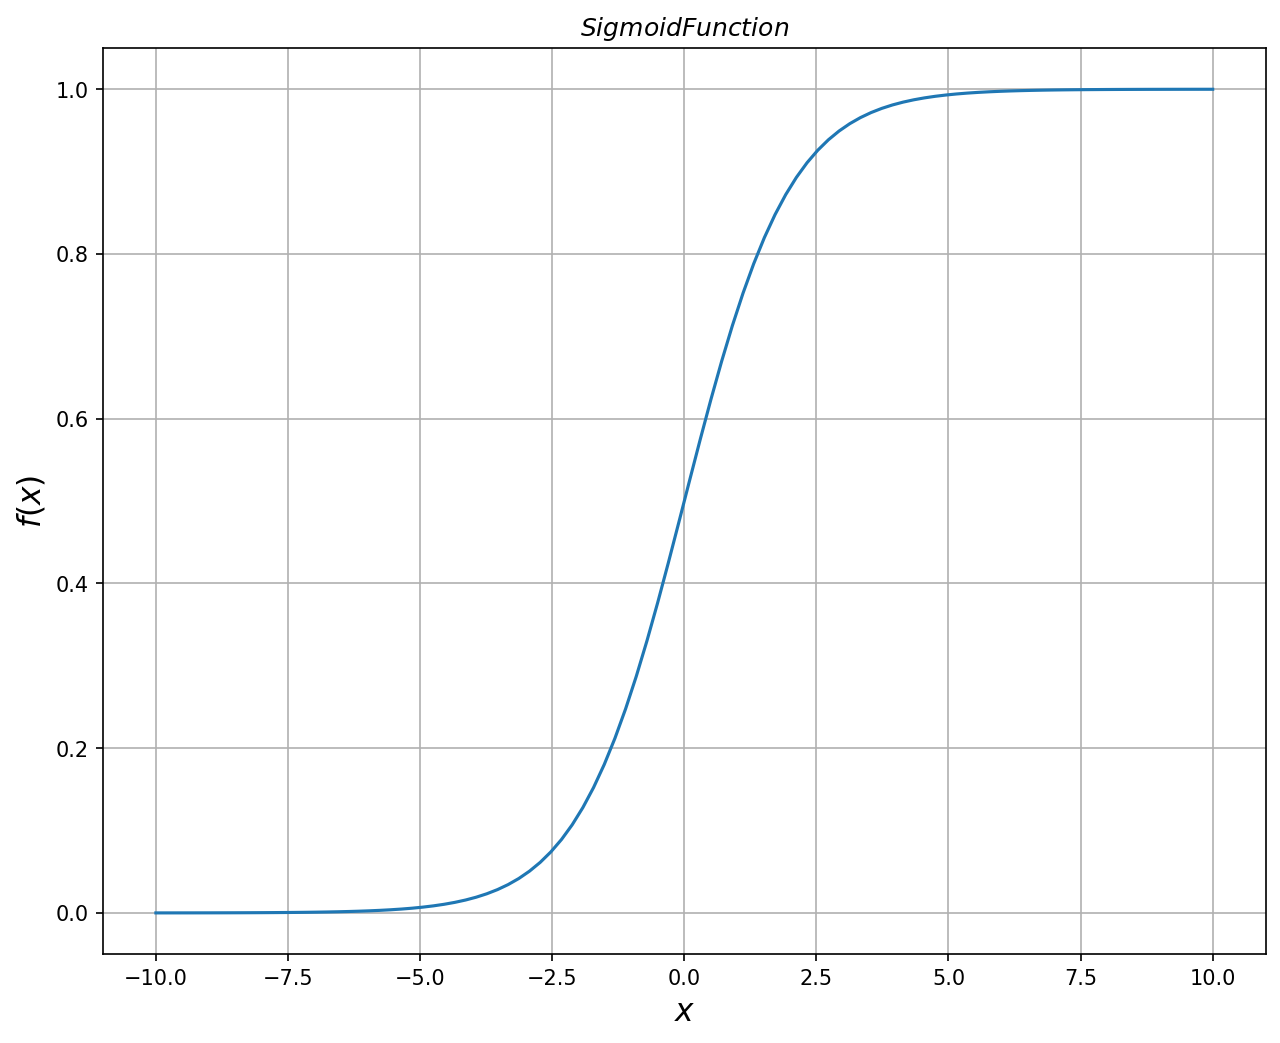

In [20]:
x=np.linspace(-10,10,100)
plt.figure(figsize=(10,8),dpi=150)
plt.plot(x,(1/(1+np.exp(-x))))
plt.grid(True)
plt.xlabel('$x$',size=15)
plt.ylabel('$f(x)$',size=15)
plt.title('$Sigmoid Function$')

# map

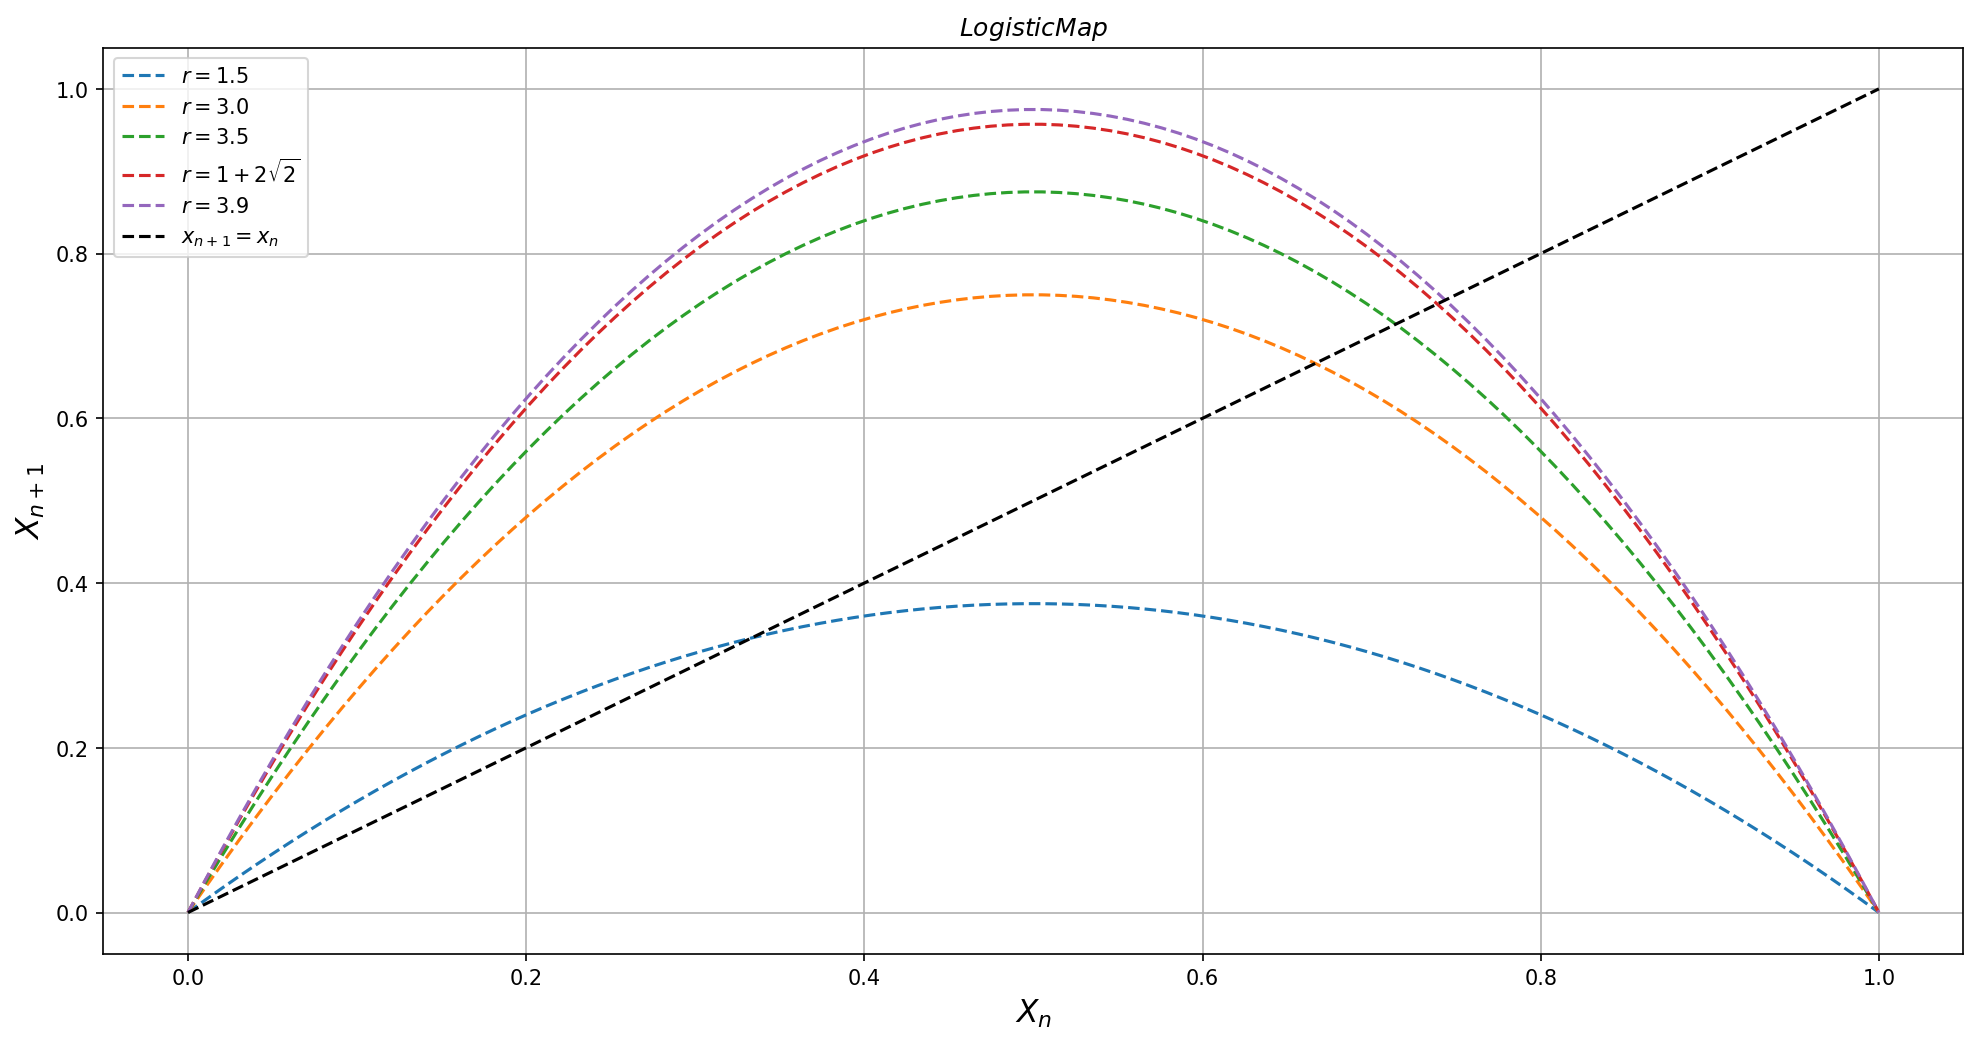

In [36]:
def LogisticMapFunction(x,r): # 定义 logistic map
    return r*x*(1-x)

def LogisticMapDynamics(x,r,n): # x0,x1,x2,...,xn
    X = []
    Y = []
    for i in np.arange(0,n):
        X.append(i)
        Y.append(x)
        x = LogisticMapFunction(x,r)
    return np.array(X),np.array(Y)


X = np.linspace(0,1,100)
a=1+2*np.sqrt(2)
Y1 = LogisticMapFunction(X,1.5)
Y2 = LogisticMapFunction(X,3.0)
Y3 = LogisticMapFunction(X,3.5)
Y4 = LogisticMapFunction(X,a)
Y5 = LogisticMapFunction(X,3.9)
Y6 = X


plt.figure(figsize=(16, 8),dpi=150)
plt.plot(X,Y1,'--',label="$r=1.5$")
plt.plot(X,Y2,'--',label="$r=3.0$")
plt.plot(X,Y3,'--',label="$r=3.5$")
plt.plot(X,Y4,'--',label="$r=1+2\sqrt{2}$")
plt.plot(X,Y5,'--',label="$r=3.9$")
plt.plot(X,Y6,'k--',label="$x_{n+1}=x_{n}$")
plt.xlabel("$X_{n}$",size=15)
plt.ylabel("$X_{n+1}$",size=15)
plt.title("$Logistic Map$")
plt.legend(loc=0)
plt.grid(True)

# series

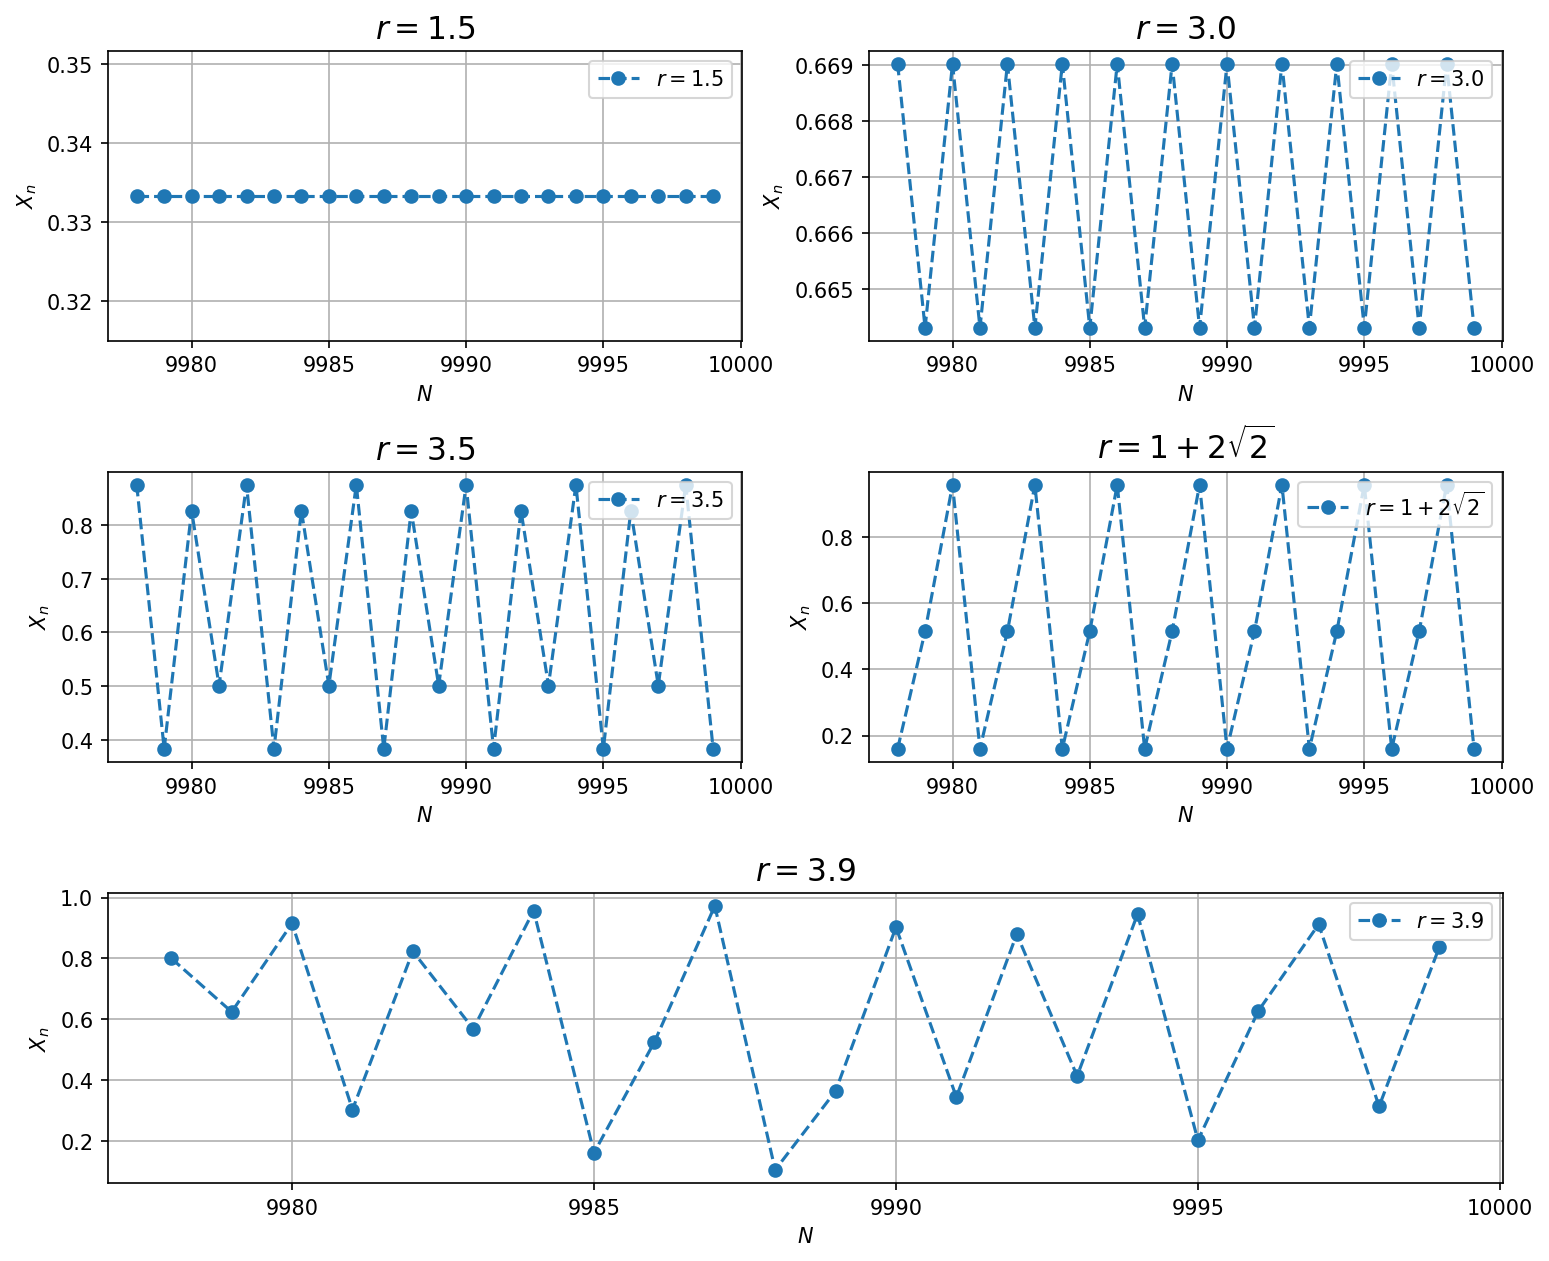

In [35]:
def logmapfun(x,r):
    return r*x*(1-x)


def logmapdynamics(x,r,n):
    N=[]
    X=[]
    for i in range(1,n):
        N.append(i)
        X.append(x)
        x=logmapfun(x,r)
    return N,X

#x=np.random.rand(1)
x=0.5 #初值取0.5
N2,X2=logmapdynamics(x,1.5,10000)
N3,X3=logmapdynamics(x,3.0,10000)
N4,X4=logmapdynamics(x,3.5,10000)
N5,X5=logmapdynamics(x,1+2*np.sqrt(2),10000)
N6,X6=logmapdynamics(x,3.9,10000)

plt.figure(figsize=(12,10),dpi=150)

plt.subplots_adjust(hspace=0.45)
plt.subplot(3,2,1)
plt.plot(N2[9977:9999],X2[9977:9999],'o--',label="$r=1.5$")
plt.xlabel("$N$")
plt.ylabel("$X_{n}$")
plt.title("$r=1.5$",size=15)
plt.legend(loc=1)
plt.grid(True)

plt.subplot(3,2,2)
plt.plot(N3[9977:9999],X3[9977:9999],'o--',label="$r=3.0$")
plt.xlabel("$N$")
plt.ylabel("$X_{n}$")
plt.title("$r=3.0$",size=15)
plt.legend(loc=1)
plt.grid(True)

plt.subplot(3,2,3)
plt.plot(N4[9977:9999],X4[9977:9999],'o--',label="$r=3.5$")
plt.xlabel("$N$")
plt.ylabel("$X_{n}$")
plt.title("$r=3.5$",size=15)
plt.legend(loc=1)
plt.grid(True)

plt.subplot(3,2,4)
plt.plot(N5[9977:9999],X5[9977:9999],'o--',label="$r=1+2\sqrt{2}$")
plt.xlabel("$N$")
plt.ylabel("$X_{n}$")
plt.title("$r=1+2\sqrt{2}$",size=15)
plt.legend(loc=1)
plt.grid(True)

plt.subplot(3,2,(5,6))
plt.plot(N6[9977:9999],X6[9977:9999],'o--',label="$r=3.9$")
plt.xlabel("$N$")
plt.ylabel("$X_{n}$")
plt.title("$r=3.9}$",size=15)
plt.legend(loc=1)
plt.grid(True)

# bifurcation

C:\Users\dolin\AppData\Local\Temp/ipykernel_19372/2356027772.py:28: RuntimeWarning: divide by zero encountered in log
  dx = dx + np.log(np.abs(r-2*r*x1))


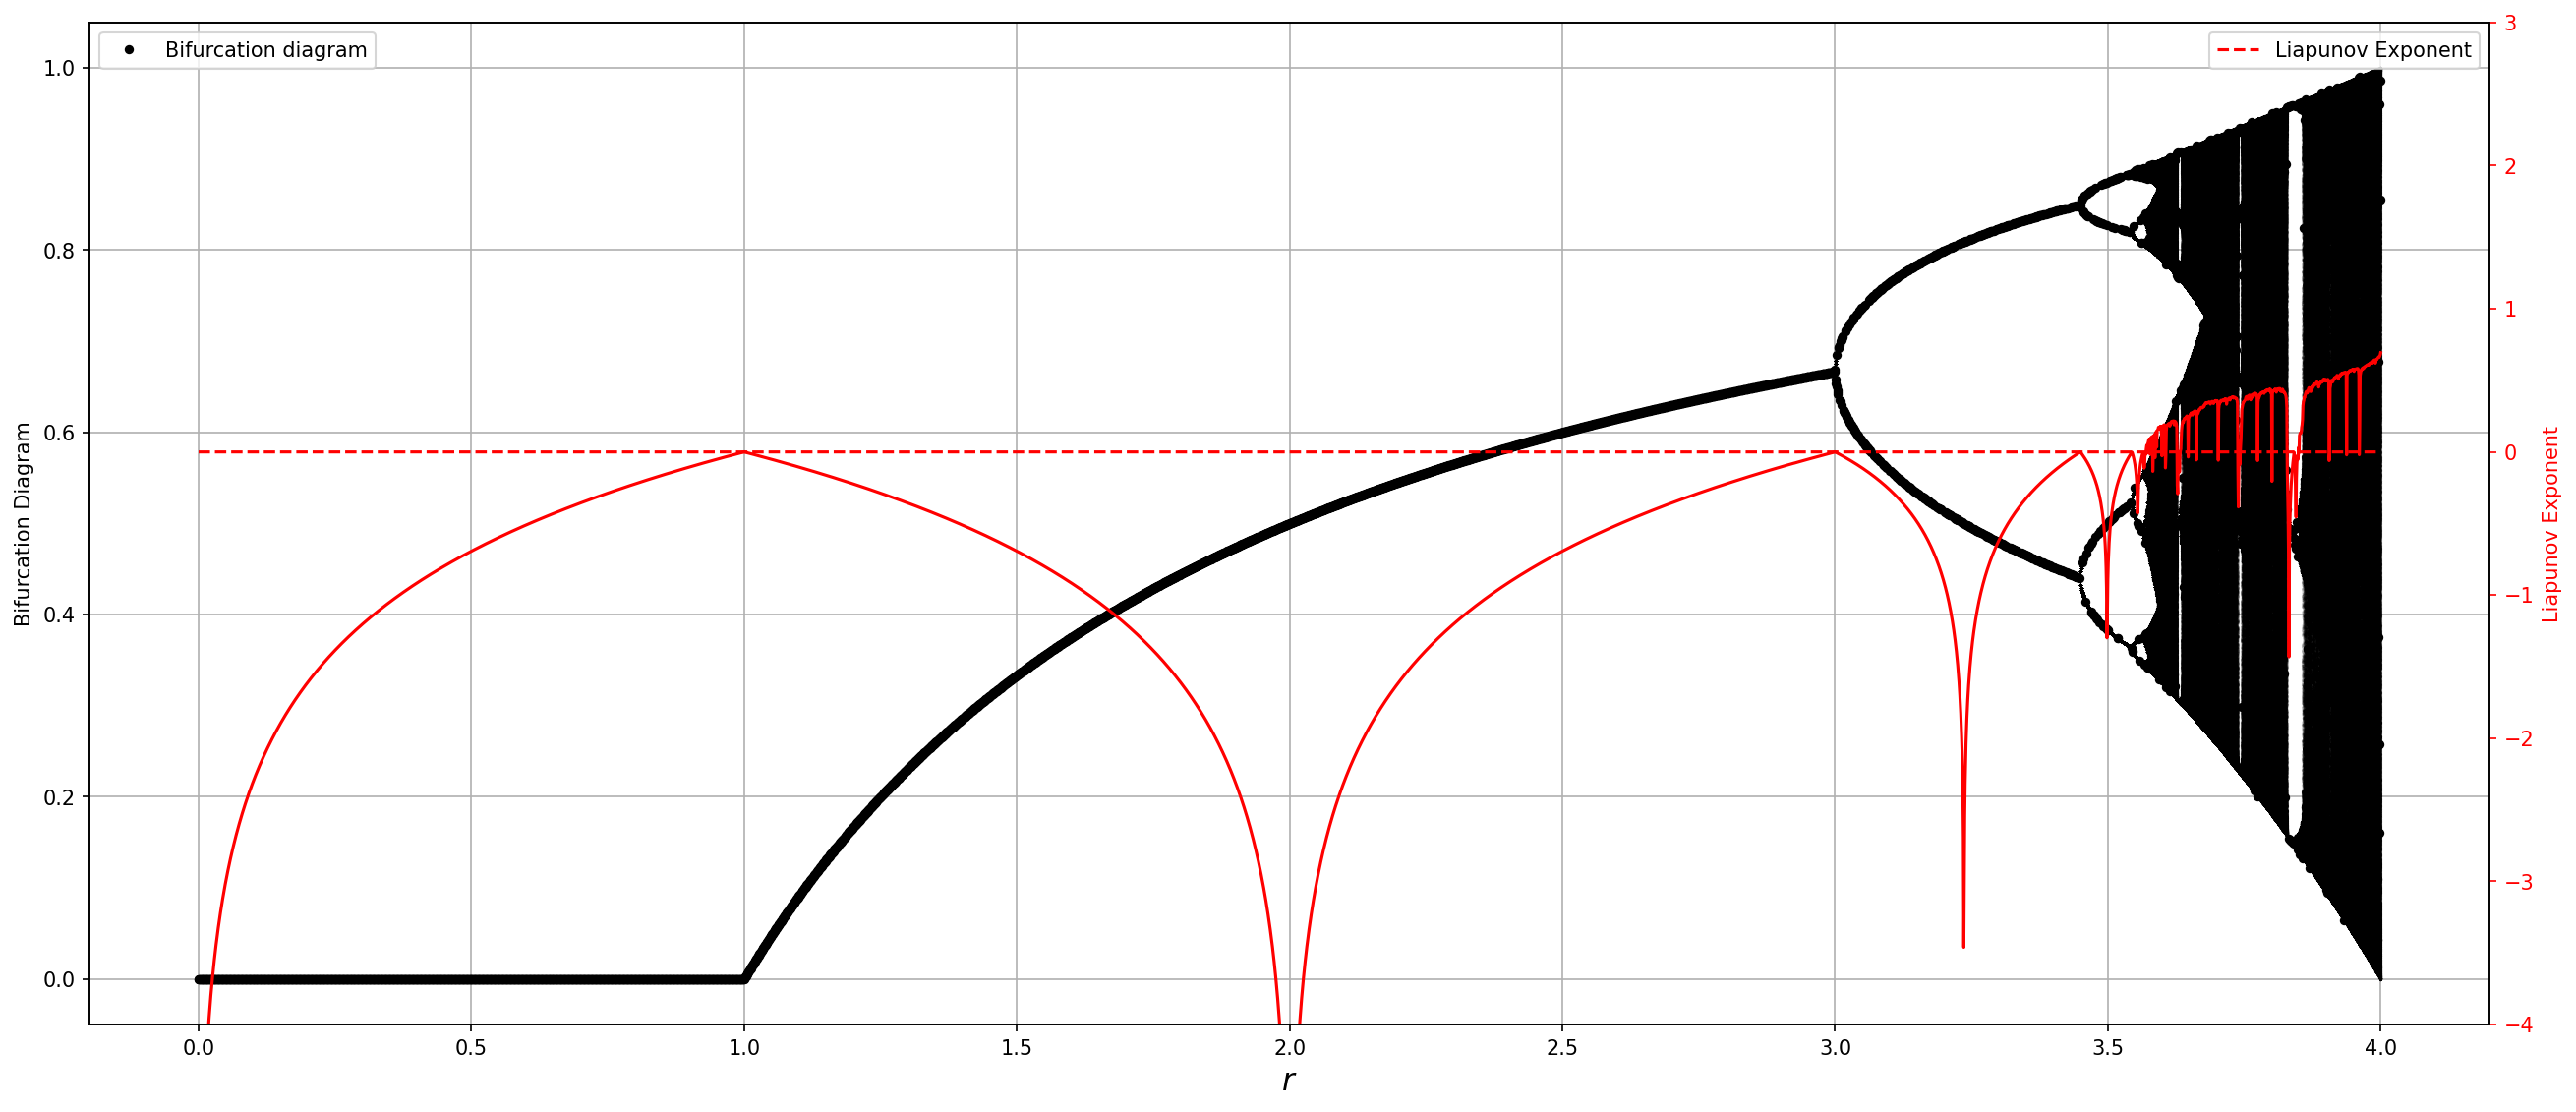

In [38]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

def LogisticMapFunction(x,r): # 定义 logistic map
    return r*x*(1-x)

def LogisticMapDynamics(x,r,n): # x0,x1,x2,...,xn
    X = []
    Y = []
    for i in np.arange(0,n):
        X.append(i)
        Y.append(x)
        x = LogisticMapFunction(x,r)
    return np.array(X),np.array(Y)

N = 30000
r = np.linspace(0,4,5000)

x1 = np.random.rand(len(r))
dx = np.zeros(len(r))

for i in np.arange(0,5000): # 去暂态
    x1 = LogisticMapFunction(x1,r)


for i in np.arange(0,N):
    dx = dx + np.log(np.abs(r-2*r*x1))
    x1 = LogisticMapFunction(x1,r)
    
L = dx/N # 李指数


x = np.random.rand(len(r))

for i in np.arange(5000):  # 去暂态
    x = r*x*(1-x)

fig= plt.figure(figsize=(21, 9),dpi=150)

ax1 = fig.add_subplot(111)
x = r*x*(1-x)
ax1.plot(r,x,'k.',markersize = 7,alpha = 1,label='Bifurcation diagram')
for i in np.arange(5000):
    x = r*x*(1-x)
    ax1.plot(r,x,'k.',markersize = 1,alpha = 0.1)
ax1.set_ylabel("Bifurcation Diagram")
ax1.set_xlabel("$r$",size=15)
ax1.grid(True)
#fig.axis([3.568,3.575,0.34,0.36])
#plt.xlabel("$r$")
#plt.ylabel("$X$")
#plt.title("bifurcation plot")

Zero = np.zeros(len(r))
ax2 = ax1.twinx()
ax2.plot(r,L,'r-')
p1, = ax2.plot(r,Zero,'r--',label='Liapunov Exponent')
ax2.set_ylim(-4,3)
ax2.set_ylabel("Liapunov Exponent")
ax2.yaxis.label.set_color(p1.get_color())
ax2.tick_params(axis='y',colors=p1.get_color())
ax1.legend(loc=0)
ax2.legend(loc=0)


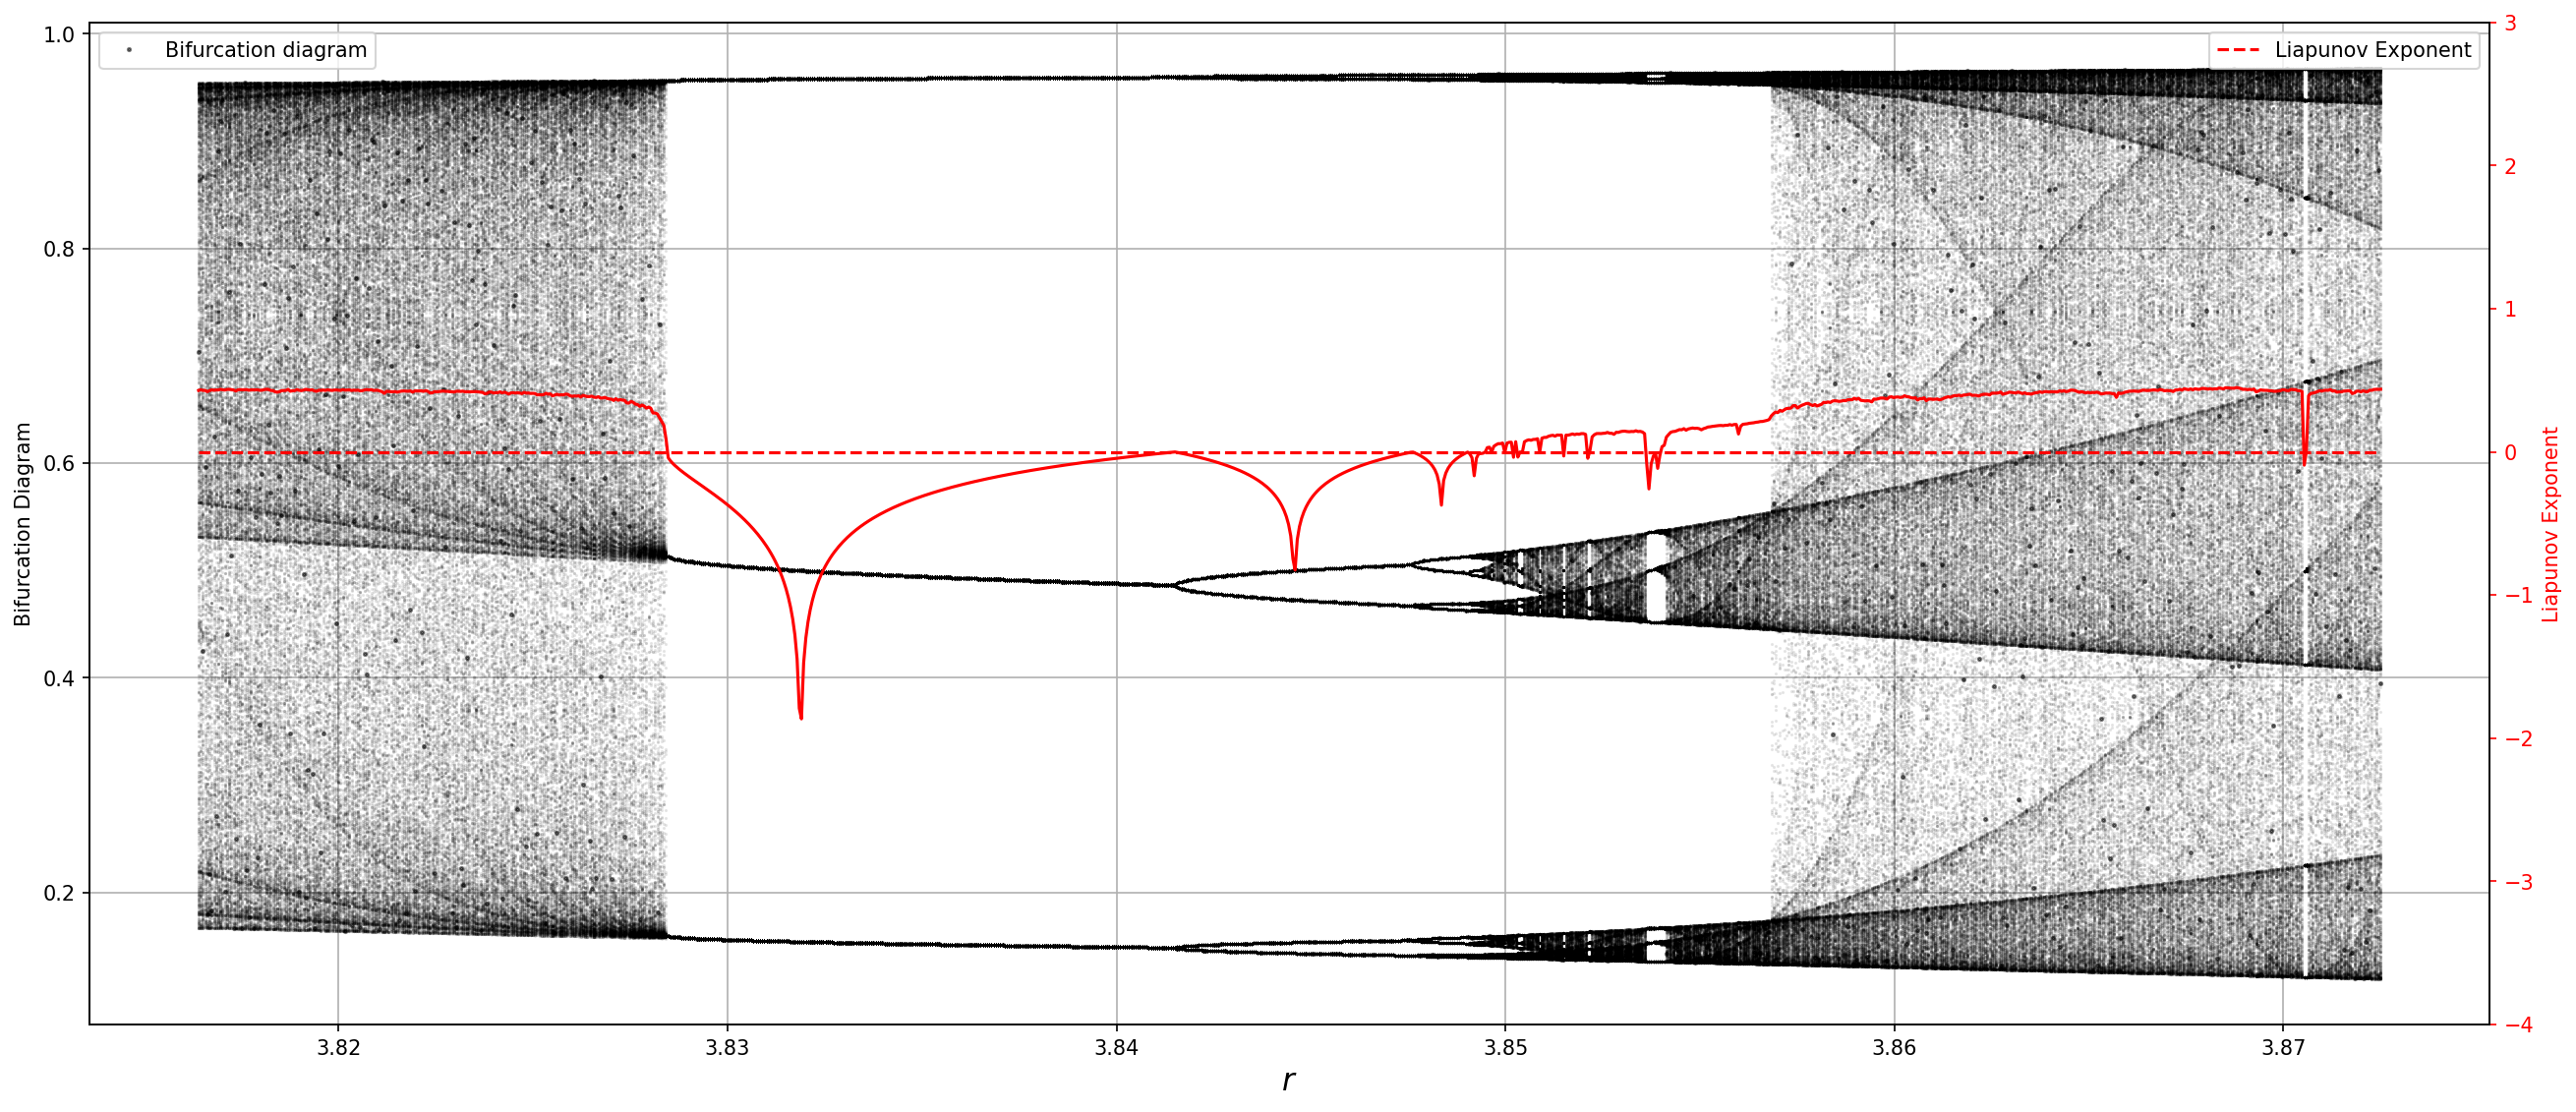

In [52]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

def LogisticMapFunction(x,r): # 定义 logistic map
    return r*x*(1-x)

def LogisticMapDynamics(x,r,n): # x0,x1,x2,...,xn
    X = []
    Y = []
    for i in np.arange(0,n):
        X.append(i)
        Y.append(x)
        x = LogisticMapFunction(x,r)
    return np.array(X),np.array(Y)

N = 30000
r = np.linspace(3.8164,3.8725,1000)

x1 = np.random.rand(len(r))
dx = np.zeros(len(r))

for i in np.arange(0,5000): # 去暂态
    x1 = LogisticMapFunction(x1,r)


for i in np.arange(0,N):
    dx = dx + np.log(np.abs(r-2*r*x1))
    x1 = LogisticMapFunction(x1,r)
    
L = dx/N # 李指数


x = np.random.rand(len(r))

for i in np.arange(5000):  # 去暂态
    x = r*x*(1-x)

fig= plt.figure(figsize=(21, 9),dpi=150)

ax1 = fig.add_subplot(111)
x = r*x*(1-x)
ax1.plot(r,x,'k.',markersize = 3,alpha = 0.5,label='Bifurcation diagram')
for i in np.arange(1000):
    x = r*x*(1-x)
    ax1.plot(r,x,'k.',markersize = 1,alpha = 0.1)
ax1.set_ylabel("Bifurcation Diagram")
ax1.set_xlabel("$r$",size=15)
ax1.grid(True)
#fig.axis([3.568,3.575,0.34,0.36])
#plt.xlabel("$r$")
#plt.ylabel("$X$")
#plt.title("bifurcation plot")

Zero = np.zeros(len(r))
ax2 = ax1.twinx()
ax2.plot(r,L,'r-')
p1, = ax2.plot(r,Zero,'r--',label='Liapunov Exponent')
ax2.set_ylim(-4,3)
ax2.set_ylabel("Liapunov Exponent")
ax2.yaxis.label.set_color(p1.get_color())
ax2.tick_params(axis='y',colors=p1.get_color())
ax1.legend(loc=0)
ax2.legend(loc=0)


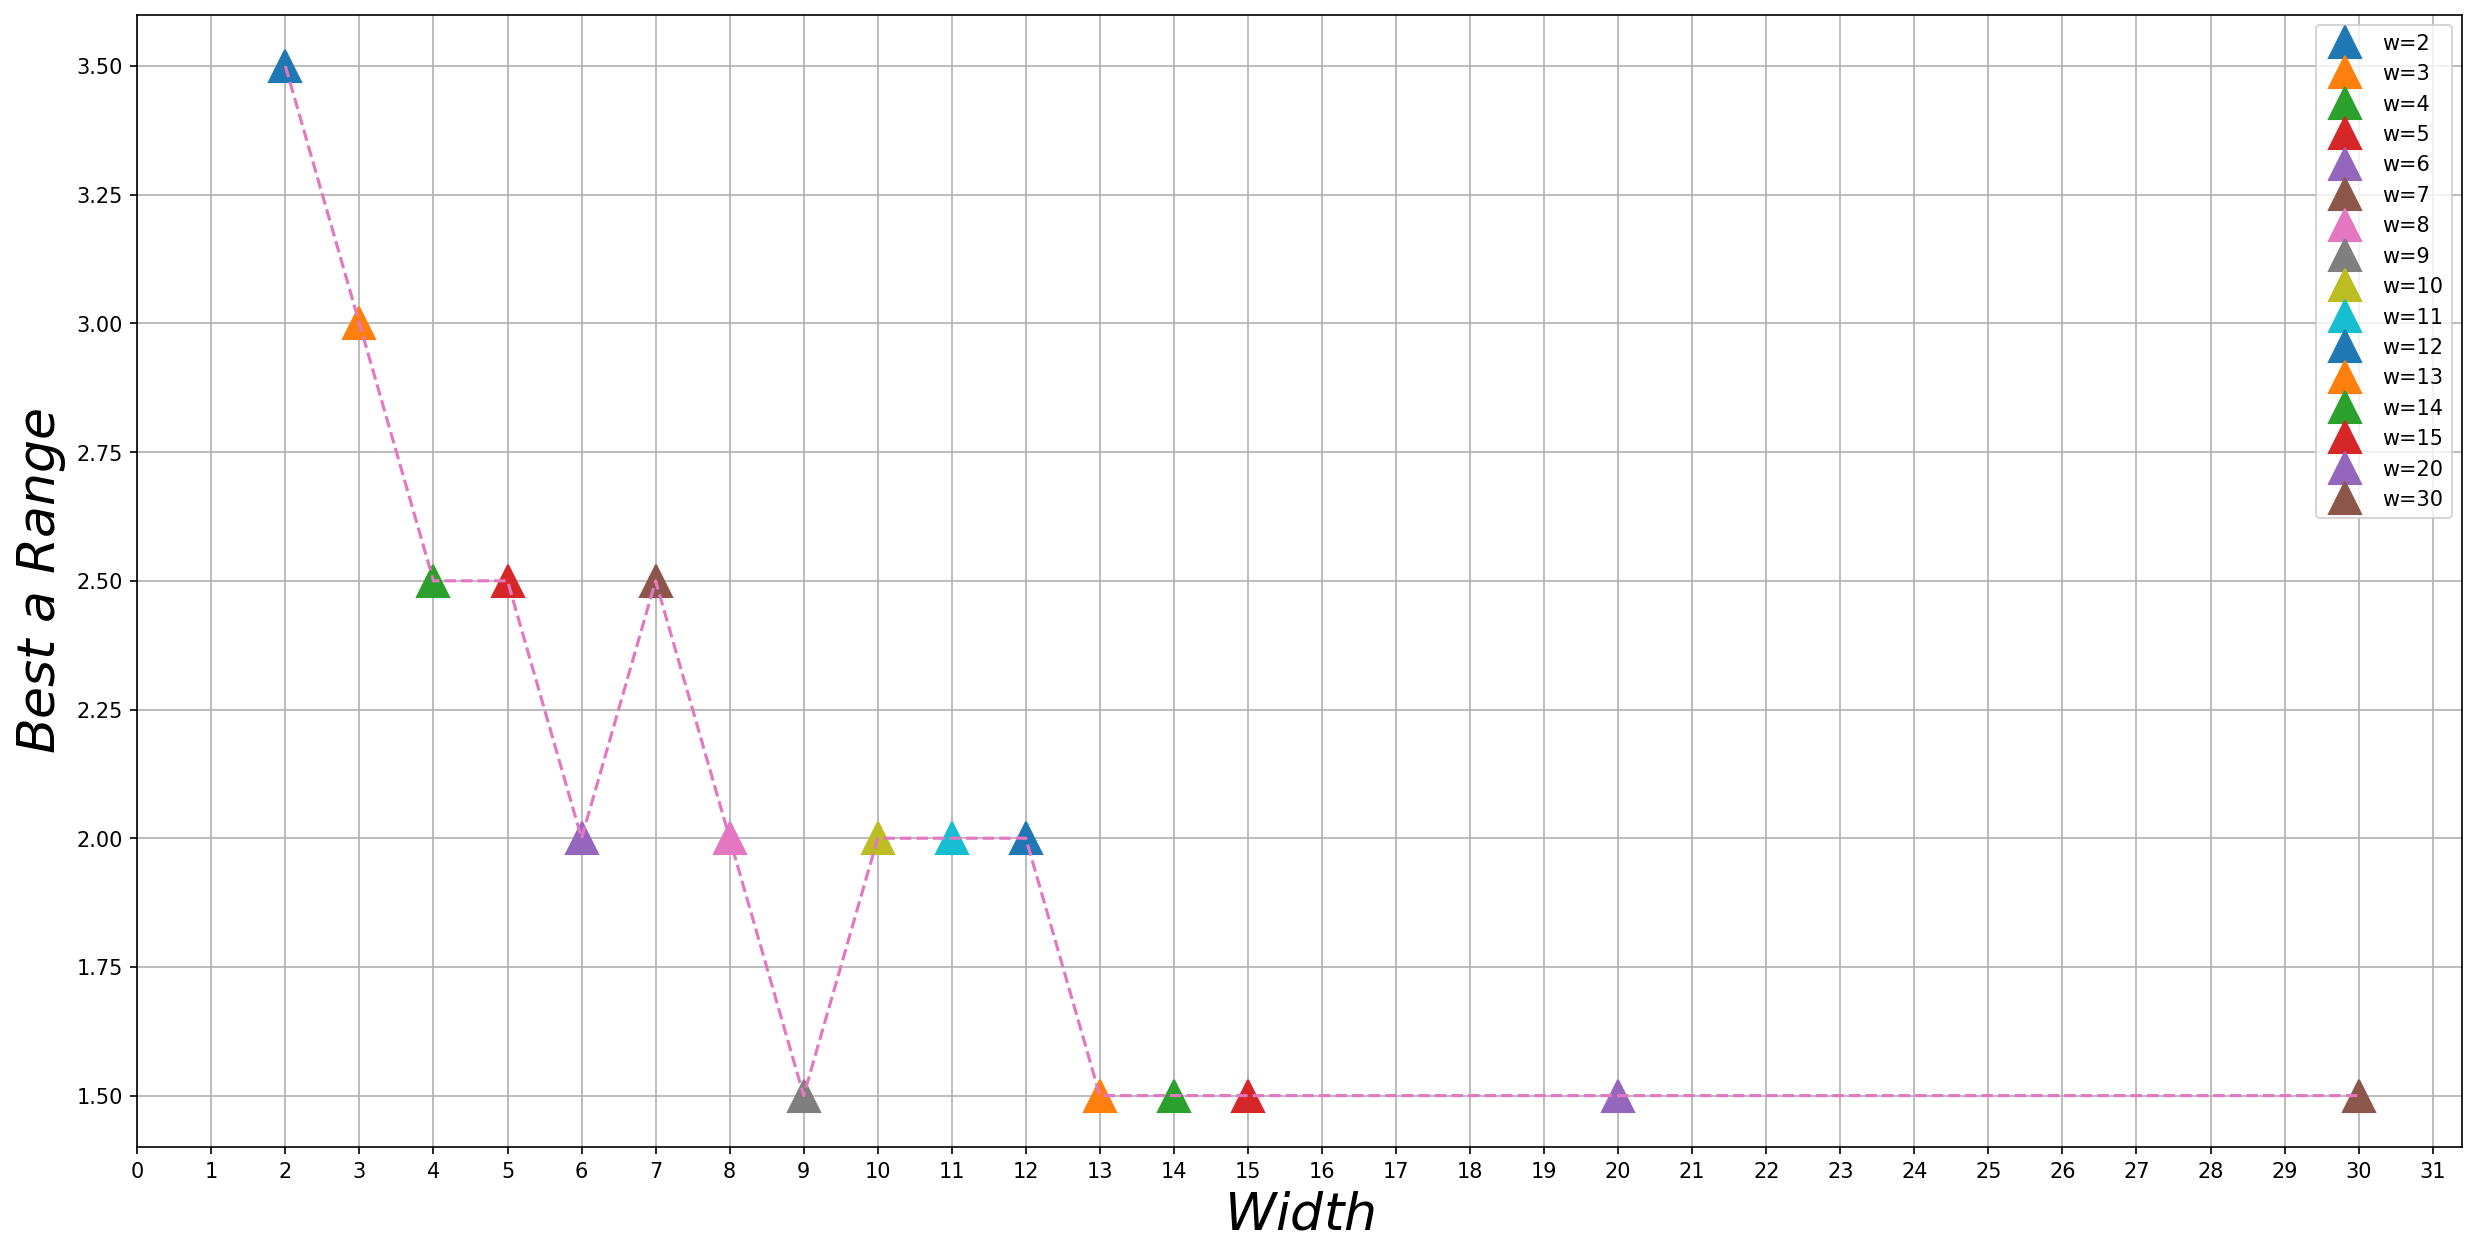

In [71]:
w=np.array([2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,30])
l=np.array([[3.5],[3.0],[2.5],[2.5],[2.0],[2.5],[2.0],[1.5],[2.0],[2.0],[2.0],[1.5],[1.5],[1.5],[1.5],[1.5]])
paramtar=np.array(['w=2','w=3','w=4','w=5','w=6','w=7','w=8','w=9','w=10','w=11','w=12','w=13','w=14','w=15','w=20','w=30'])
plt.figure(figsize=(20,10),dpi=150)

for i in range(16):
    plt.plot(w[i],l[i],'^',markersize=15,label=paramtar[i])
plt.plot(w,l,'--')
plt.xticks(np.arange(0,32,1))
plt.legend(loc=0)
plt.xlabel('$Width$',size=25)
plt.ylabel('$Best$ $a$ $Range$',size=25)
plt.grid(True)